# Technical Analysis: Part 2 -- Supervised Machine Learning

- From unsupervised ML techniques, I was able to determine that best target variable (best because it explains the most variance of all the y-variables in dataset.
- From unsupervised ML techniques, I was able to determine that one of the best feature variables (best because it explains the most variance of all the x-variables in dataset. 
- There are still many features left in the dataset. I will analyze feature importance over feature variables using random forests in order to reduce dimensionality and find most significant feature variables to focus on.


### Random Forests

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
features_w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/features_w2.csv')
features_w2.head()

,Unnamed: 0,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Num_services
0,7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,2
1,7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AK,0.0,1
2,7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,AK,0.0,3
3,7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AK,0.0,1
4,7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,2


In [7]:
targets_w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/targets_w2.csv')
targets_w2.head()

,Unnamed: 0,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn
0,7328,4,2,2,7,2,2,2,2,4,3,2,2,4,4,4,4
1,7329,2,2,2,5,2,2,2,2,4,2,2,2,3,4,4,4
2,7330,4,2,2,5,2,2,2,3,4,2,3,3,4,4,4,4
3,7331,4,2,2,5,2,3,2,2,4,3,2,2,4,4,4,4
4,7332,4,2,2,5,3,2,2,2,4,3,2,2,4,5,2,4


In [ ]:
# feature importance

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(targets_w2['HighEdCert'])
X = pd.get_dummies(features_w2.drop('Unnamed: 0', axis=1))

In [37]:
X.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y

array([7, 5, 5, ..., 3, 3, 7])

In [9]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
pd.Series(y).value_counts()


3    2813
5    2508
7    1705
0     110
4      95
8      62
9      19
6       7
1       7
2       2
dtype: int64

In [13]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,  
                feature_names=X.columns,  
                class_names=le.classes_,  
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S136') dtype('S136') dtype('S136')

In [ ]:
# df[df['persons']=='2'].acceptability.value_counts()


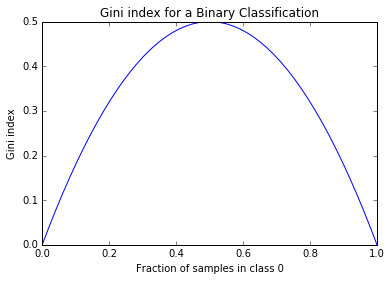

In [14]:
C0 = np.linspace(0,1)
C1 = 1.0 - C0

gini = 1 - C0**2 - C1**2

plt.plot(C0, gini)
plt.title('Gini index for a Binary Classification')
plt.xlabel('Fraction of samples in class 0')
plt.ylabel('Gini index')

In [15]:
root_node_values = [0.22, 0.04, 0.7, 0.04]

def gini(values):
    tot = 0.0
    for val in values:
        tot += val ** 2
    
    return 1.0 - tot

gini(root_node_values)

0.45840000000000003

In [16]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
St_IA,0.376174
St_LA,0.315785
St_CO,0.268576
DelinqntSv,0.025892
AcSuppSv,0.006806


In [ ]:
# gini_gain_persons_2  = 1.0   * 0.45728376  - 0.667 * 0.57923569 - 0.333 * 0.0
# gini_gain_safety_low   = 0.666 * 0.57923569 - 0.444 * 0.62880113 - 0.222 * 0.0
# gini_gain_buying_vhigh = 0.444 * 0.62880113 - 0.333 * 0.6285747 - 0.111 * 0.46875

# norm = gini_gain_persons_2 + gini_gain_safety_low + gini_gain_buying_vhigh

# print "persons_2:", gini_gain_persons_2 / norm
# print "safety_low:", gini_gain_safety_low / norm
# print "buying_vhigh:", gini_gain_buying_vhigh / norm

In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 58)

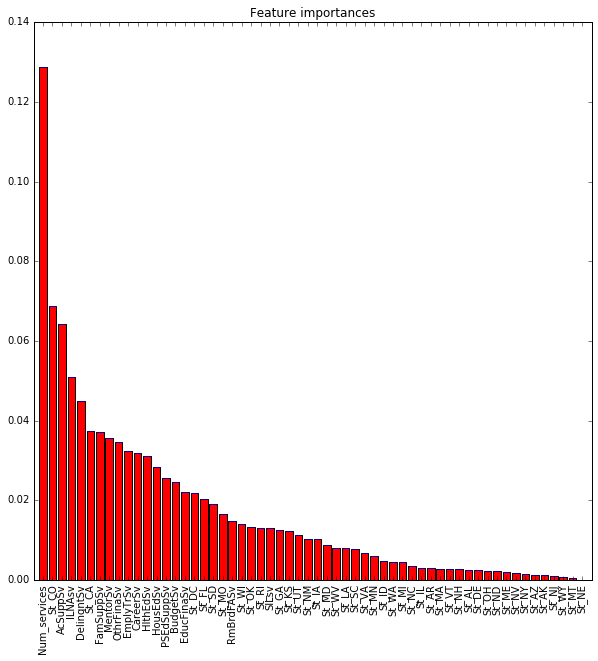

In [24]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

,dt_importance,rf_importance,et_importance
Num_services,0.179702,0.128723,0.087507
St_CO,0.019885,0.068852,0.065418
AcSuppSv,0.047365,0.064287,0.061179
ILNAsv,0.049740,0.051070,0.067769
DelinqntSv,0.023812,0.045075,0.036949
St_CA,0.017278,0.037418,0.050919
FamSuppSv,0.056915,0.037077,0.040140
MentorSv,0.040316,0.035569,0.034634
OthrFinaSv,0.027833,0.034741,0.036753
EmplyTrSv,0.049897,0.032310,0.040656


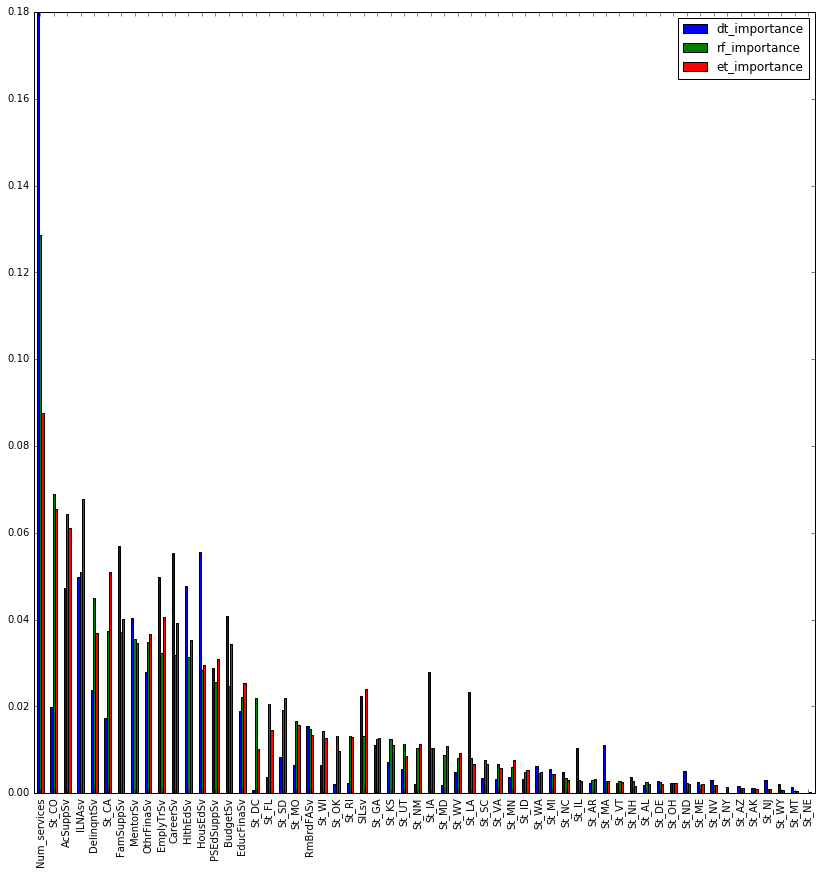

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

et.fit(X, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(10)

In [39]:
X = X[['Num_services', 'St_CO', 'AcSuppSv', 'ILNAsv', 'DelinqntSv', 'St_CA']]
X.head()

,Num_services,St_CO,AcSuppSv,ILNAsv,DelinqntSv,St_CA
0,2,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0
2,3,0.0,0.0,1.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0
4,2,0.0,0.0,1.0,0.0,0.0


In [ ]:
# random forest classifier

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
Num_services    7328 non-null int64
St_CO           7328 non-null float64
AcSuppSv        7328 non-null float64
ILNAsv          7328 non-null float64
DelinqntSv      7328 non-null float64
St_CA           7328 non-null float64
dtypes: float64(5), int64(1)
memory usage: 343.6 KB


# 2. Useful preparation

Since we will compare several models, let's write a couple of helper functions.

- Separate X and y between a train and test set, using 30% test set, random state = 42

- make sure that the data is shuffled and stratified

- Define a function called evaluate_model, that trains the model on the train set, tests it on the test, calculates:
    
    - accuracy score
    
    - confusion matrix
    
    - classification report
    
- Initialize a global dictionary to store the various models for later retrieval

In [41]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

all_models = {}

# 3.a KNN

Let's start with KNeighborsClassifier.

- Initialize a KNN model
- Evaluate it's performance with the function you previously defined
- Find the optimal value of K using grid search
- Be careful on how you perform the cross validation in the grid search

In [42]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[  2   0   0  18   0   5   0   8   0   0]
 [  0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  8   0   0 433   0 265   0 138   0   0]
 [  0   0   0  12   0  13   0   4   0   0]
 [  0   0   0 310   0 299   0 144   0   0]
 [  0   0   0   0   0   2   0   0   0   0]
 [  4   0   0 227   0 191   0  90   0   0]
 [  1   0   0  11   0   5   0   2   0   0]
 [  1   0   0   3   0   1   0   1   0   0]]
             precision    recall  f1-score   support

          0       0.12      0.06      0.08        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.43      0.51      0.47       844
          4       0.00      0.00      0.00        29
          5       0.38      0.40      0.39       753
          6       0.00      0.00      0.00         2
          7       0.23      0.18      0.20       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [44]:
gsknn.fit(X, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [45]:
gsknn.best_params_


{'n_neighbors': 51}

In [46]:
gsknn.best_score_

0.40966157205240172

In [47]:
evaluate_model(gsknn.best_estimator_)


[[  0   0   0  25   0   4   0   4   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  0   0   0 543   0 263   0  38   0   0]
 [  0   0   0  12   0  15   0   2   0   0]
 [  0   0   0 389   0 339   0  25   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0 289   0 205   0  18   0   0]
 [  0   0   0  11   0   7   0   1   0   0]
 [  0   0   0   5   0   0   0   1   0   0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.43      0.64      0.51       844
          4       0.00      0.00      0.00        29
          5       0.41      0.45      0.43       753
          6       0.00      0.00      0.00         2
          7       0.20      0.04      0.06       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

0.408905043162199

In [48]:
all_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

# 3.b Bagging + KNN

Now that we have found the optimal K, let's wrap KNeighborsClassifier in a BaggingClassifier and see if the score improves.

- Wrap the KNN model in a Bagging Classifier
- Evaluate performance
- Do a grid search only on the bagging classifier params

In [49]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())

In [50]:
evaluate_model(baggingknn)


[[  4   0   0  19   0   2   0   8   0   0]
 [  0   0   0   0   0   1   0   1   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [ 11   0   0 553   0 192   0  88   0   0]
 [  0   0   0  11   0  15   0   3   0   0]
 [  0   0   0 399   0 287   0  67   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  4   0   0 305   0 155   0  48   0   0]
 [  1   0   0   9   0   7   0   2   0   0]
 [  0   0   0   4   0   0   0   2   0   0]]
             precision    recall  f1-score   support

          0       0.20      0.12      0.15        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.66      0.52       844
          4       0.00      0.00      0.00        29
          5       0.43      0.38      0.41       753
          6       0.00      0.00      0.00         2
          7       0.22      0.09      0.13       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

0.40527033166742388

In [51]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [52]:
gsbaggingknn.fit(X, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [53]:
gsbaggingknn.best_params_

{'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 20}

In [54]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}


[[  0   0   0  18   0   4   0  11   0   0]
 [  0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  1   0   0 497   0 324   0  22   0   0]
 [  0   0   0  16   0  13   0   0   0   0]
 [  0   0   0 327   0 412   0  14   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  0   0   0 256   0 242   0  14   0   0]
 [  0   0   0  10   0   7   0   2   0   0]
 [  0   0   0   3   0   1   0   2   0   0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.44      0.59      0.50       844
          4       0.00      0.00      0.00        29
          5       0.41      0.55      0.47       753
          6       0.00      0.00      0.00         2
          7       0.22      0.03      0.05       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

# 4. Logistic Regression

Let's see if logistic regression performs better
 - Initialize LR and test on Train/Test set
 - Find optimal params with Grid Search
 - See if Bagging improves the score

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

[[  9   0   0  24   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  9   0   0 619   0 216   0   0   0   0]
 [  1   0   0  16   0  12   0   0   0   0]
 [  0   0   0 456   0 297   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  7   0   0 339   0 166   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   4   0   1   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.32      0.27      0.30        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.73      0.53       844
          4       0.00      0.00      0.00        29
          5       0.43      0.39      0.41       753
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

In [56]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X, y)

print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 10.0}
0.427265283843
[[ 10   0   0  23   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  9   0   0 619   0 216   0   0   0   0]
 [  1   0   0  16   0  12   0   0   0   0]
 [  0   0   0 456   0 297   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  9   0   0 337   0 166   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   4   0   1   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.32      0.30      0.31        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.73      0.53       844
          4       0.00      0.00      0.00        29
          5       0.43      0.39      0.41       753
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00       512
          8       0.00      0.00      0.00     

In [57]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}


{'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': True}
0.430949781659
[[  0   0   0  33   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  0   0   0 732   0 112   0   0   0   0]
 [  0   0   0  19   0  10   0   0   0   0]
 [  0   0   0 546   0 207   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  0   0   0 423   0  89   0   0   0   0]
 [  0   0   0  15   0   4   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.41      0.87      0.56       844
          4       0.00      0.00      0.00        29
          5       0.49      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0

# 5. Decision Trees

Let's see if Decision Trees perform better

- Initialize DT and test on Train/Test set
- Find optimal params with Grid Search
- See if Bagging improves the score

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[  9   0   0  17   0   3   0   4   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [ 11   0   0 635   0 160   0  38   0   0]
 [  1   0   0  17   0  11   0   0   0   0]
 [  0   0   0 481   0 249   0  23   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  7   0   0 351   0 134   0  20   0   0]
 [  1   0   0  12   0   6   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.30      0.27      0.29        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.75      0.54       844
          4       0.00      0.00      0.00        29
          5       0.44      0.33      0.38       753
          6       0.00      0.00      0.00         2
          7       0.24      0.04      0.07       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

In [59]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'random', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
0.433951965066
[[ 11   0   0  21   0   0   0   1   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [ 18   0   0 724   0 101   0   1   0   0]
 [  1   0   0  19   0   9   0   0   0   0]
 [  0   0   0 550   0 203   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  6   0   0 419   0  84   0   3   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.29      0.33      0.31        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.41      0.86      0.56       844
          4       0.00      0.00      0.00        29
          5       0.50      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0

In [60]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': True}
0.433269650655
[[  4   0   0  29   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  5   0   0 736   0 103   0   0   0   0]
 [  0   0   0  19   0  10   0   0   0   0]
 [  0   0   0 548   0 205   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  3   0   0 422   0  86   0   1   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.31      0.12      0.17        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.41      0.87      0.56       844
          4       0.00      0.00      0.00        29
          5       0.50      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       1.00      0.00      0

# 6. Support Vector Machines

Let's see if SVM perform better
 - Initialize SVM and test on Train/Test set
 - Find optimal params with Grid Search
 - See if Bagging improves the score

In [61]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}

[[ 11   0   0  22   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  8   0   0 727   0 109   0   0   0   0]
 [  1   0   0  18   0  10   0   0   0   0]
 [  0   0   0 547   0 206   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  6   0   0 417   0  89   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.39      0.33      0.36        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.41      0.86      0.56       844
          4       0.00      0.00      0.00        29
          5       0.49      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

In [62]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X, y)
print gssvm.best_params_
print gssvm.best_score_

all_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'linear', 'C': 1.0, 'gamma': 'auto'}
0.432723799127
[[ 12   0   0  21   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [ 10   0   0 722   0 112   0   0   0   0]
 [  1   0   0  18   0  10   0   0   0   0]
 [  0   0   0 546   0 207   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [ 10   0   0 413   0  89   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.34      0.36      0.35        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.41      0.86      0.56       844
          4       0.00      0.00      0.00        29
          5       0.49      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00       512
          8       0.00      

In [63]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.432723799127
[[ 12   0   0  21   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [ 10   0   0 722   0 112   0   0   0   0]
 [  1   0   0  18   0  10   0   0   0   0]
 [  0   0   0 546   0 207   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [ 10   0   0 413   0  89   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.34      0.36      0.35        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.41      0.86      0.56       844
          4       0.00      0.00      0.00        29
          5       0.49      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0.00      0.00      

# 7. Random Forest & Extra Trees

Let's see if Random Forest and Extra Trees perform better

 - Initialize RF and ET and test on Train/Test set
 - Find optimal params with Grid Search

In [64]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[  9   0   0  16   0   2   0   6   0   0]
 [  0   0   0   1   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [ 13   0   0 618   0 135   2  76   0   0]
 [  1   0   0  17   0  11   0   0   0   0]
 [  0   0   0 470   0 229   1  53   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  8   0   0 339   0 126   0  39   0   0]
 [  1   0   0  11   0   6   0   1   0   0]
 [  1   0   0   4   0   0   0   1   0   0]]
             precision    recall  f1-score   support

          0       0.27      0.27      0.27        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.73      0.53       844
          4       0.00      0.00      0.00        29
          5       0.45      0.30      0.36       753
          6       0.00      0.00      0.00         2
          7       0.22      0.08      0.11       512
          8       0.00      0.00      0.00        19
          9       0.00      0.00      

In [65]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 10, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': None}
0.433815502183
[[ 12   0   0  21   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  8   0   0 739   0  96   0   1   0   0]
 [  1   0   0  19   0   9   0   0   0   0]
 [  0   0   0 553   0 200   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  8   0   0 420   0  84   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.39      0.36      0.38        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.88      0.56       844
          4       0.00      0.00      0.00        29
          5       0.51      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0.00

In [66]:
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X, y)
print gset.best_params_
print gset.best_score_

all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': None}
0.433815502183
[[ 12   0   0  21   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  9   0   0 738   0  97   0   0   0   0]
 [  1   0   0  19   0   9   0   0   0   0]
 [  0   0   0 553   0 200   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0]
 [  8   0   0 419   0  85   0   0   0   0]
 [  1   0   0  14   0   4   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.38      0.36      0.37        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         1
          3       0.42      0.87      0.56       844
          4       0.00      0.00      0.00        29
          5       0.50      0.27      0.35       753
          6       0.00      0.00      0.00         2
          7       0.00

# 8. Model comparison

Let's compare the scores of the various models.
- Do a bar chart of the scores of the best models. Who's the winner on the train/test split?
- Re-test all the models using a 3 fold stratified shuffled cross validation
- Do a bar chart with errorbars of the cross validation average scores. is the winner the same?

,score
model,
gsrf,0.432076
gset,0.431622
gsbaggingdt,0.429805
svm,0.428896
gsbaggingsvm,0.427533
gsdt,0.427533
gssvm,0.427533
gsbagginglr,0.426624
gslr,0.420718


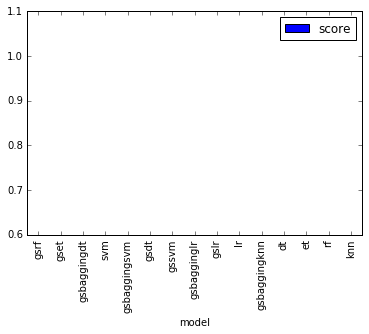

In [67]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

In [68]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres

/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


knn gsbagginglr gsrf svm et gsbaggingsvm gslr rf gsbaggingdt gsdt lr gset gssvm gsbaggingknn dt


,score,error
model,,
gsdt,0.434225,0.001823
gsbaggingsvm,0.432731,0.006409
gssvm,0.432728,0.003401
gset,0.432457,0.008986
svm,0.430954,0.003364
gsbagginglr,0.430398,0.004283
gsbaggingdt,0.427944,0.003142
lr,0.427544,0.007548
gsbaggingknn,0.426312,0.005062


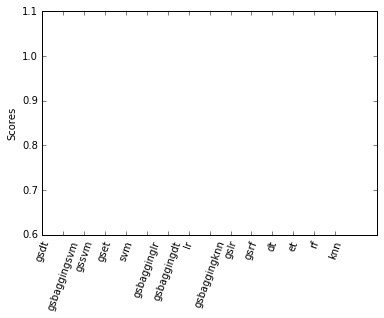

In [69]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

# cvscores.to_csv('../../../5.2-lesson/assets/datasets/car_evaluation/model_comparison.csv')
cvscores

# Bonus

We have encoded the data using a map that preserves the scale. Would our results have changed if we had encoded the categorical data using pd.get_dummies or OneHotEncoder to encode them as binary variables instead?

- Repeat the analysis for this scenario. Is it better?
- Experiment with other models or other parameters, can you beat your classmates best score?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

onehotpipe = make_pipeline(OneHotEncoder(),
                           dt)


all_models['onehotpipe'] = {'model': onehotpipe,
                            'score': evaluate_model(onehotpipe)}

In [ ]:
# performance metrics

In [ ]:
# predictions on cohort 2 dataset

### NEXT STEPS:

- Wait for data from 2016
- Test Predictions/Validate Model

In [2]:
connection = psy.connect("dbname=nytd_clean_data user=cguy")

cohort_1 = psql.read_sql("SELECT * FROM cohort_1", connection)

In [3]:
cohort_1 = cohort_1.drop('index',axis=1)
cohort_1.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
1,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
3,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17


In [4]:
wave_stID = cohort_1[['Wave', 'StFCID']]
wave_stID.head()

,Wave,StFCID
0,Wave 1: Age 17 Baseline Survey,AK450290395006
1,Wave 1: Age 17 Baseline Survey,AK450290395006
2,Wave 2: Age 19 Followup,AK450290395006
3,Wave 2: Age 19 Followup,AK450290395006
4,Wave 1: Age 17 Baseline Survey,AK450448396586


In [5]:
c1w1 = cohort_1.loc[cohort_1['Wave'] == "Wave 1: Age 17 Baseline Survey"]
c1w2 = cohort_1.loc[cohort_1['Wave'] == "Wave 2: Age 19 Followup"]
c1w1.describe()

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,12018.000000,22111.0,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.00000,22111.000000,22111.000000,...,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000
mean,2.015134,2011.0,24.522455,1.506897,0.033603,0.015241,0.352132,0.00493,0.530143,1.455294,...,12.439103,12.380173,12.286192,12.194609,12.192936,12.219619,12.273167,11.988422,5.280494,16.560355
std,1.465403,0.0,17.300343,0.499964,0.180210,0.122514,0.477646,0.07004,0.499102,10.436163,...,27.925521,27.950643,27.990404,28.028794,28.029492,28.018345,27.995886,29.961278,15.140712,0.528911
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
25%,NaN,2011.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000
75%,NaN,2011.0,36.000000,2.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,17.000000
max,18.650000,2011.0,72.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,20.000000


In [6]:
c1w2.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7280.000000,11906.0,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,...,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000
mean,3.530985,2011.0,24.591886,1.510331,0.042332,0.014111,0.338821,0.005627,0.573156,0.467579,...,3.875777,3.810180,3.710398,3.577524,3.592306,3.622291,3.681253,9.035612,3.963716,16.512347
std,3.376826,0.0,16.405165,0.499914,0.201353,0.117952,0.473329,0.074808,0.494640,5.887108,...,16.008149,16.021843,16.042136,16.068158,16.065320,16.059519,16.047942,25.736902,11.456084,0.500204
min,0.880000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,NaN,2011.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,NaN,2011.0,37.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,80.710000,2011.0,56.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,18.000000


In [7]:
c1w1_noDups = c1w1.drop_duplicates('StFCID')

In [8]:
c1w1_noDups.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7405.000000,13743.0,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,...,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000
mean,1.995284,2011.0,23.951830,1.504475,0.034490,0.015135,0.353489,0.005166,0.526232,1.379102,...,10.836499,10.774358,10.683985,10.593102,10.586408,10.616168,10.675689,12.199738,5.140872,16.711999
std,1.396944,0.0,17.121035,0.499998,0.182491,0.122094,0.478070,0.071693,0.499330,10.167792,...,26.335660,26.359967,26.395016,26.429904,26.432460,26.421084,26.398215,30.220365,14.729140,0.478629
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
25%,NaN,2011.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000
75%,NaN,2011.0,36.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,17.000000
max,18.650000,2011.0,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,20.000000


In [9]:
c1w1_noDups.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17
8,Wave 1: Age 17 Baseline Survey,AK450461296715,2011-03-01,Not in sample,NaT,"Yes, is in FC on Date","Yes, employed full time","Yes, employed part time",Yes,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
10,Wave 1: Age 17 Baseline Survey,AK450540097503,2011-03-01,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,1,1,1,1,17
14,Wave 1: Age 17 Baseline Survey,AK450652098623,2011-03-01,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,1,1,17


In [10]:
c1w2_noDups = c1w2.drop_duplicates('StFCID')

In [11]:
c1w2_noDups.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,4499.000000,7354.0,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,...,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000
mean,3.421336,2011.0,24.421539,1.507887,0.042834,0.014142,0.338047,0.006119,0.571798,0.443840,...,3.318874,3.252516,3.154474,3.023797,3.033315,3.070574,3.132853,9.111504,3.883601,16.673647
std,3.121785,0.0,16.349738,0.499972,0.202496,0.118084,0.473077,0.077990,0.494852,5.733879,...,14.748996,14.761526,14.779473,14.802351,14.800725,14.794298,14.783340,25.858339,11.113024,0.468910
min,0.880000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,NaN,2011.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,NaN,2011.0,37.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,80.710000,2011.0,56.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,17.000000


In [12]:
c1w2_noDups.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
6,Wave 2: Age 19 Followup,AK450448396586,2013-03-01,Youth participated,2012-12-03,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,0,3,3,17
12,Wave 2: Age 19 Followup,AK450540097503,2013-03-01,Youth participated,2013-01-17,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,1,1,1,1,17
15,Wave 2: Age 19 Followup,AK450652098623,2013-03-01,Youth participated,2012-11-19,"No, is not in FC on Date",No,"Yes, employed part time",No,No,...,0,0,0,0,0,0,0,1,1,17
18,Wave 2: Age 19 Followup,AK451448406587,2013-09-01,Youth participated,2013-05-17,"No, is not in FC on Date","Yes, employed full time",No,No,No,...,0,0,0,0,0,0,1,3,3,17


In [13]:
# Create list of Wave2 ID's
# Create dataframe of W1 participants who are W2 participants using list

wave_2 = c1w2_noDups[['StFCID']]
list(wave_2)

['StFCID']

In [14]:
c1w1_onlyw2 = c1w1_noDups.loc[c1w1_noDups['StFCID'].isin(wave_2.StFCID.values)]


In [15]:
c1w1_onlyw2.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17
10,Wave 1: Age 17 Baseline Survey,AK450540097503,2011-03-01,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,1,1,1,1,17
14,Wave 1: Age 17 Baseline Survey,AK450652098623,2011-03-01,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,1,1,17
17,Wave 1: Age 17 Baseline Survey,AK451448406587,2011-09-01,Youth participated,2011-05-25,"Yes, is in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,3,3,17


In [16]:
c1w1_onlyw2.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7328.000000,7328.0,7328.000000,7328.000000,7328.000000,7328.000000,7328.00000,7328.000000,7328.000000,7328.000000,...,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000
mean,1.998709,2011.0,24.459607,1.508597,0.042576,0.014192,0.33911,0.006141,0.570688,0.445278,...,3.329967,3.261736,3.164984,3.034116,3.043805,3.081332,3.143832,9.125000,3.886736,16.673717
std,1.403456,0.0,16.345358,0.499960,0.201914,0.118290,0.47344,0.078128,0.495012,5.743981,...,14.773944,14.786853,14.804598,14.827563,14.825904,14.819415,14.808391,25.878989,11.131422,0.468884
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,1.180000,2011.0,8.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,1.480000,2011.0,22.000000,2.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,2.340000,2011.0,37.000000,2.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,18.650000,2011.0,56.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,17.000000


In [17]:
frames = [c1w1_onlyw2, c1w2_noDups]

cohort_1_w1w2 = pd.concat(frames)

In [18]:
cohort_1_w1w2.Wave.value_counts()

Wave 2: Age 19 Followup           7354
Wave 1: Age 17 Baseline Survey    7328
Name: Wave, dtype: int64

In [19]:
wave_1 = c1w1_noDups[['StFCID']]
list(wave_1)
cohort_1_w1w2 = cohort_1_w1w2.loc[cohort_1_w1w2['StFCID'].isin(wave_1.StFCID.values)]


In [20]:
cohort_1_w1w2.Wave.value_counts()

Wave 1: Age 17 Baseline Survey    7328
Wave 2: Age 19 Followup           7328
Name: Wave, dtype: int64

In [21]:
# Dropping non-important features:

cohort_1_w1w2 = cohort_1_w1w2.drop(['SocSecrty','EmplySklls', 'EducAid','Children','Marriage','CnctAdult'], axis=1)

In [22]:
cohort_1_w1w2.columns

Index([u'Wave', u'StFCID', u'RepDate_outcomes', u'OutcmRpt', u'OutcmDte',
       u'OutcmFCS', u'CurrFTE', u'CurrPTE', u'PubFinAs', u'PubFoodAs',
       u'PubHousAs', u'OthrFinAs', u'HighEdCert', u'CurrenRoll', u'Homeless',
       u'SubAbuse', u'Incarc', u'Medicaid', u'OthrHlthIn', u'MedicalIn',
       u'MentlHlthIn', u'PrescripIn', u'SampleState', u'InSample', u'Baseline',
       u'FY11Cohort', u'Elig19', u'Weight', u'Responded', u'FY',
       u'RepDate_services', u'StFIPS', u'St', u'DOB', u'Sex', u'AmIAKN',
       u'Asian', u'BlkAfrAm', u'HawaiiPI', u'White', u'RaceUnkn', u'RaceDcln',
       u'HisOrgin', u'FCStatSv', u'TribeSv', u'DelinqntSv', u'EdLevlSv',
       u'SpecEdSv', u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv',
       u'EmplyTrSv', u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv',
       u'MentorSv', u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv',
       u'Race', u'RaceEthn', u'AgeMP'],
      dtype='object')

In [140]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['PubFoodAs','PubHousAs','OthrFinAs','HighEdCert','CurrFTE','CurrPTE', \
                     'PubFinAs','CurrenRoll','PrescripIn','Homeless','SubAbuse','Incarc','Medicaid','OthrHlthIn','MedicalIn','MentlHlthIn', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','St','DelinqntSv','Wave']]


In [141]:
for column in features:
    print (column + str(features[column].unique()))

ILNAsv[ 0  1 77]
AcSuppSv[ 0  1 77]
PSEdSuppSv[ 0  1 77]
CareerSv[ 0  1 77]
EmplyTrSv[ 0  1 77]
BudgetSv[ 0  1 77]
HousEdSv[ 1  0 77]
HlthEdSv[ 0  1 77]
FamSuppSv[ 0  1 77]
MentorSv[ 0  1 77]
SILsv[ 0  1 77]
RmBrdFASv[ 0  1 77]
EducFinaSv[ 0  1 77]
OthrFinaSv[ 1  0 77]
St['AK' 'AL' 'AR' 'AZ' 'CA' 'RI' 'CO' 'DC' 'DE' 'FL' 'GA' 'IA' 'ID' 'IL' 'KS'
 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV'
 'NY' 'OH' 'OK' 'SC' 'SD' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
DelinqntSv[ 0  1 77]
Wave['Wave 1: Age 17 Baseline Survey' 'Wave 2: Age 19 Followup']


In [142]:
for column in targets:
    print (column + str(targets[column].unique()))

PubFoodAs['No' 'Yes' 'Declined' 'Not Applicable (in Foster Care)' 'Blank']
PubHousAs['No' 'Yes' 'Declined' 'Blank' 'Not Applicable (in Foster Care)']
OthrFinAs['No' 'Declined' 'Yes' 'Blank']
HighEdCert['None of the above' 'High school diploma/GED' 'Declined'
 'Vocational certificate' 'Higher degree' "Bachelor's Degree"
 'Vocational license' 'Blank' "Associate's Degree" None]
CurrFTE['No' 'Yes, employed full time' 'Declined' 'Blank']
CurrPTE['No' 'Yes, employed part time' 'Declined' 'Blank']
PubFinAs['No' 'Yes' 'Declined' 'Not Applicable (in Foster Care)' 'Blank']
CurrenRoll['Yes' 'No' 'Declined' 'Blank']
PrescripIn['Yes' 'No' 'Not Applicable' "Don't Know" 'Declined' 'Blank']
Homeless['No' 'Yes' 'Blank' 'Declined']
SubAbuse['Yes' 'No' 'Declined' 'Blank']
Incarc['No' 'Yes' 'Blank' 'Declined']
Medicaid['Yes' 'No' 'Do Not Know' 'Declined' 'Blank']
OthrHlthIn['No' 'Do Not Know' 'Yes' 'Declined' 'Blank' '88.0' '78.0']
MedicalIn["Don't Know" 'No' 'Yes' 'Not Applicable' 'Declined' 'Blank']
Men

In [143]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')
services_count = services_count.drop('St')
services_count = services_count.drop('DelinqntSv')


features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Wave,Num_services
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,AK,0,Wave 1: Age 17 Baseline Survey,1
10,1,0,0,0,0,0,0,0,0,0,0,0,1,1,AK,0,Wave 1: Age 17 Baseline Survey,3
14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,AK,0,Wave 1: Age 17 Baseline Survey,1
17,1,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2
19,0,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,1
21,1,0,0,0,0,0,1,1,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,4
25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2
29,0,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,1
31,1,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2


In [162]:
# Let's focus on just W2 targets and features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_w2 = features.copy()

features_w2['St'] = le.fit_transform(features_2['St'])

features_w2 = features_w2[features_w2.Wave == "Wave 2: Age 19 Followup"]
features_w2 = features_w2.drop('Wave', axis = 1)

features_w2.head()

,St,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv,Num_services
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3
15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2


In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2_ = targets[targets.Wave == "Wave 2: Age 19 Followup"]
targets_w2_ = targets_w2_.drop('Wave', axis = 1)


targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])
targets_w2.head()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn
2,4,2,2,7,2,2,2,2,4,3,2,2,4,4,4,4
6,2,2,2,5,2,2,2,2,4,2,2,2,3,4,4,4
12,4,2,2,5,2,2,2,3,4,2,3,3,4,4,4,4
15,4,2,2,5,2,3,2,2,4,3,2,2,4,4,4,4
18,4,2,2,5,3,2,2,2,4,3,2,2,4,5,2,4


In [164]:
y_corr = np.corrcoef(targets_w2.values.T)
targets_w2.corr()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn
PubFoodAs,1.000000,0.886919,0.870077,0.714728,0.869874,0.856714,0.888024,0.858523,0.892729,0.872588,0.873892,0.858727,0.887538,0.868990,0.891632,0.889446
PubHousAs,0.886919,1.000000,0.895309,0.712087,0.890962,0.882024,0.929199,0.894590,0.914980,0.872408,0.893191,0.872126,0.904352,0.885868,0.913547,0.913284
OthrFinAs,0.870077,0.895309,1.000000,0.738008,0.924232,0.915193,0.884853,0.914356,0.941550,0.916054,0.928380,0.915808,0.929921,0.922400,0.940742,0.938488
HighEdCert,0.714728,0.712087,0.738008,1.000000,0.723115,0.715918,0.709558,0.757422,0.751611,0.748057,0.743454,0.740237,0.748196,0.732575,0.748967,0.749937
CurrFTE,0.869874,0.890962,0.924232,0.723115,1.000000,0.911457,0.883162,0.907216,0.952491,0.921979,0.932155,0.920066,0.925983,0.929696,0.953366,0.950071
CurrPTE,0.856714,0.882024,0.915193,0.715918,0.911457,1.000000,0.872666,0.902568,0.933062,0.904285,0.914444,0.899056,0.917177,0.909664,0.932853,0.928115
PubFinAs,0.888024,0.929199,0.884853,0.709558,0.883162,0.872666,1.000000,0.884991,0.905017,0.868806,0.883262,0.862984,0.899117,0.880122,0.902910,0.901851
CurrenRoll,0.858523,0.894590,0.914356,0.757422,0.907216,0.902568,0.884991,1.000000,0.934347,0.892984,0.909427,0.894658,0.927136,0.913728,0.933575,0.930470
PrescripIn,0.892729,0.914980,0.941550,0.751611,0.952491,0.933062,0.905017,0.934347,1.000000,0.935910,0.947686,0.936397,0.945660,0.956237,0.985035,0.983358
Homeless,0.872588,0.872408,0.916054,0.748057,0.921979,0.904285,0.868806,0.892984,0.935910,1.000000,0.932703,0.927434,0.915469,0.918826,0.936868,0.932474


In [165]:
eig_vals, eig_vecs = np.linalg.eig(y_corr)
print eig_vals
print eig_vecs


[  1.44077983e+01   4.00291671e-01   2.49372515e-01   1.45369332e-01
   1.36106660e-02   1.97807403e-02   1.11188252e-01   1.01881933e-01
   8.98588242e-02   5.12413705e-02   5.29265812e-02   6.29249842e-02
   7.76505095e-02   7.66646631e-02   6.77224314e-02   7.17172285e-02]
[[-0.24274627 -0.02715446  0.48993157 -0.65771877  0.00240736 -0.01172185
   0.46487323 -0.03573324  0.10888298 -0.0696121  -0.02047043  0.04894277
   0.08252407 -0.14119096  0.06212393 -0.00790653]
 [-0.24772108 -0.0904995   0.46997139  0.22998895 -0.00706364 -0.00368329
  -0.32556906  0.00594446 -0.06487427 -0.12363542  0.08107211 -0.20789057
   0.08573253 -0.35392307 -0.59028161  0.01589096]
 [-0.25326292 -0.05094828 -0.09079979  0.08714081  0.00440117  0.00648906
  -0.00317517 -0.20997205  0.26286916 -0.02442725  0.00803815  0.29862809
  -0.76787696 -0.34366885  0.04008936 -0.07052322]
 [-0.20786823  0.96888389  0.02170922  0.0271264   0.00234494  0.00331329
  -0.01963713 -0.00298085 -0.1137424  -0.01743689 -0

In [166]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[  90.04873937   92.55056231   94.10914053   95.01769885   95.71262542
   96.34938751   96.91100516   97.39632084   97.87547499   98.32370766
   98.74697286   99.14025401   99.47104514   99.79130371   99.91493334
  100.        ]


In [167]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

In [168]:
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Weight data 2d PCA projection matrix:
[[-0.24274627 -0.02715446]
 [-0.24772108 -0.0904995 ]
 [-0.25326292 -0.05094828]
 [-0.20786823  0.96888389]
 [-0.25368894 -0.10275778]
 [-0.25015934 -0.09435716]
 [-0.24587591 -0.08183761]
 [-0.25109508  0.03088238]
 [-0.25922666 -0.06640597]
 [-0.25185455 -0.00354776]
 [-0.25458118 -0.04397959]
 [-0.25145182 -0.02278282]
 [-0.25487988 -0.03453333]
 [-0.25380483 -0.07288633]
 [-0.2590987  -0.07223928]
 [-0.2583296  -0.0634675 ]]


In [169]:
Z = targets_w2.dot(weight_2d_projection)


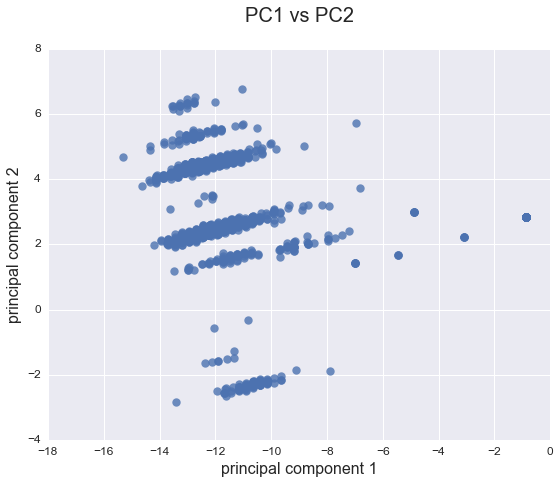

In [170]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

In [172]:
targets_2 = targets_w2

targets_pcs = targets_2.copy

targets_pcs = (targets_2 - targets_2.mean()) / targets_2.std()

targets_pcs['PC1'] = Z.iloc[:,0]
targets_pcs['PC2'] = Z.iloc[:,1]

In [173]:
targets_pcs = pd.melt(targets_pcs, id_vars=['PC1','PC2'])


In [174]:
targets_pcs.head()

,PC1,PC2,variable,value
0,-12.338658,4.512236,PubFoodAs,1.551348
1,-10.930694,2.666858,PubFoodAs,0.199028
2,-12.428195,2.542136,PubFoodAs,1.551348
3,-12.173080,2.480111,PubFoodAs,1.551348
4,-11.912217,2.543302,PubFoodAs,1.551348


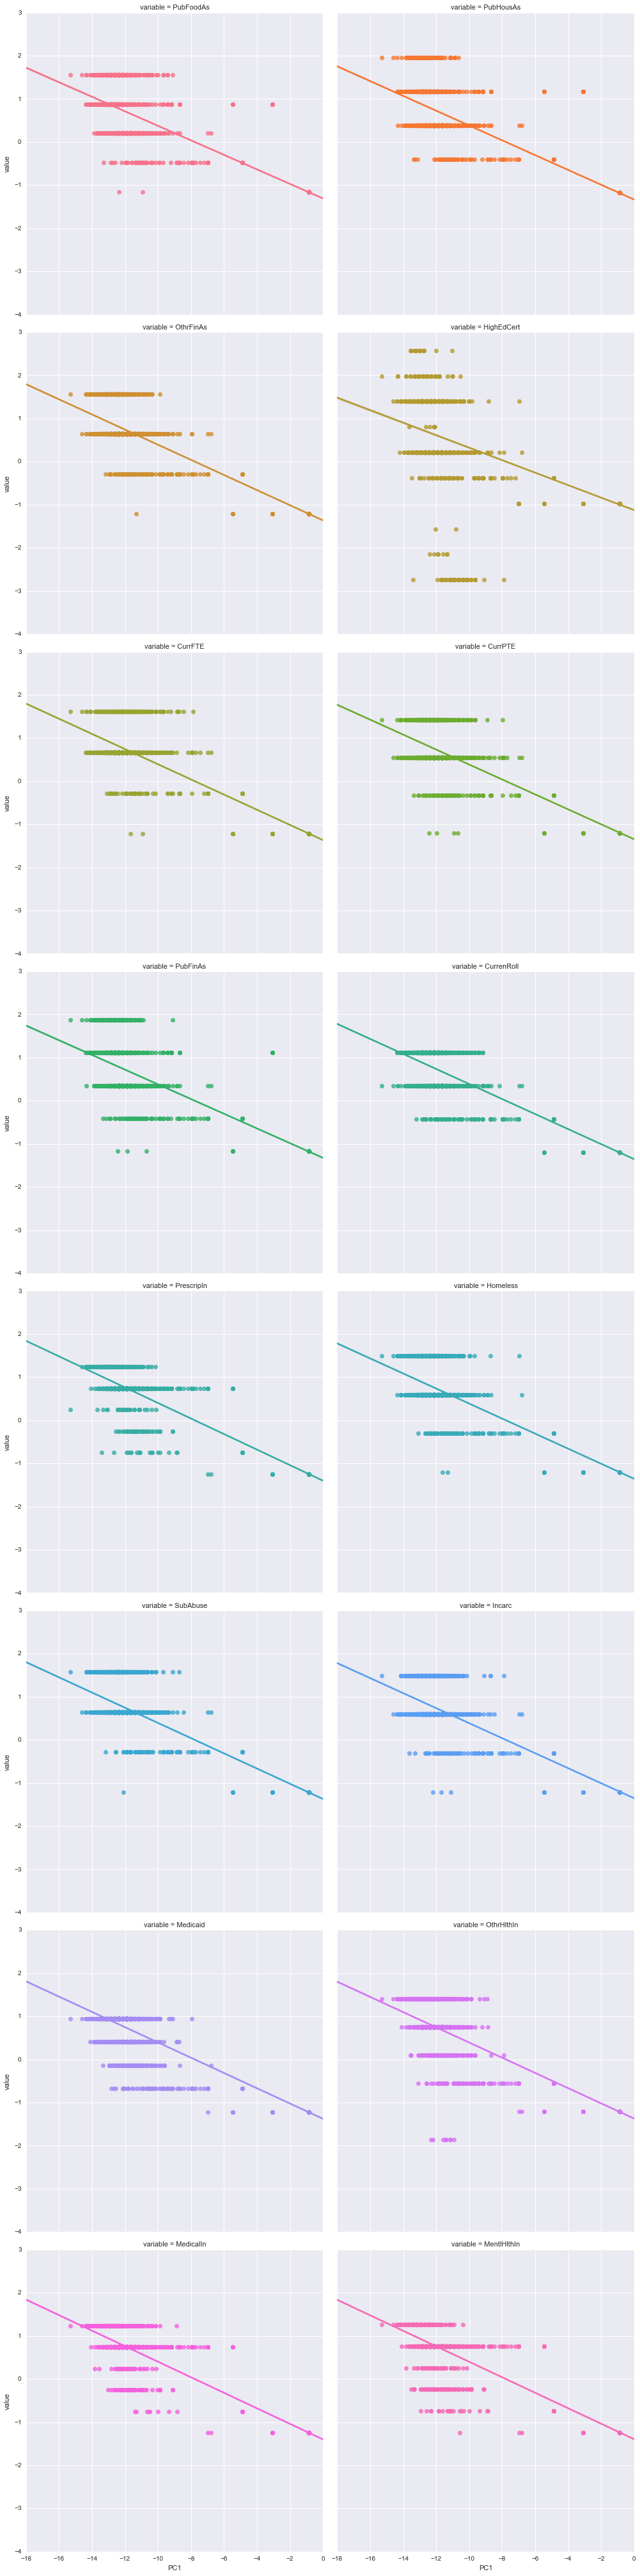

In [175]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=targets_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

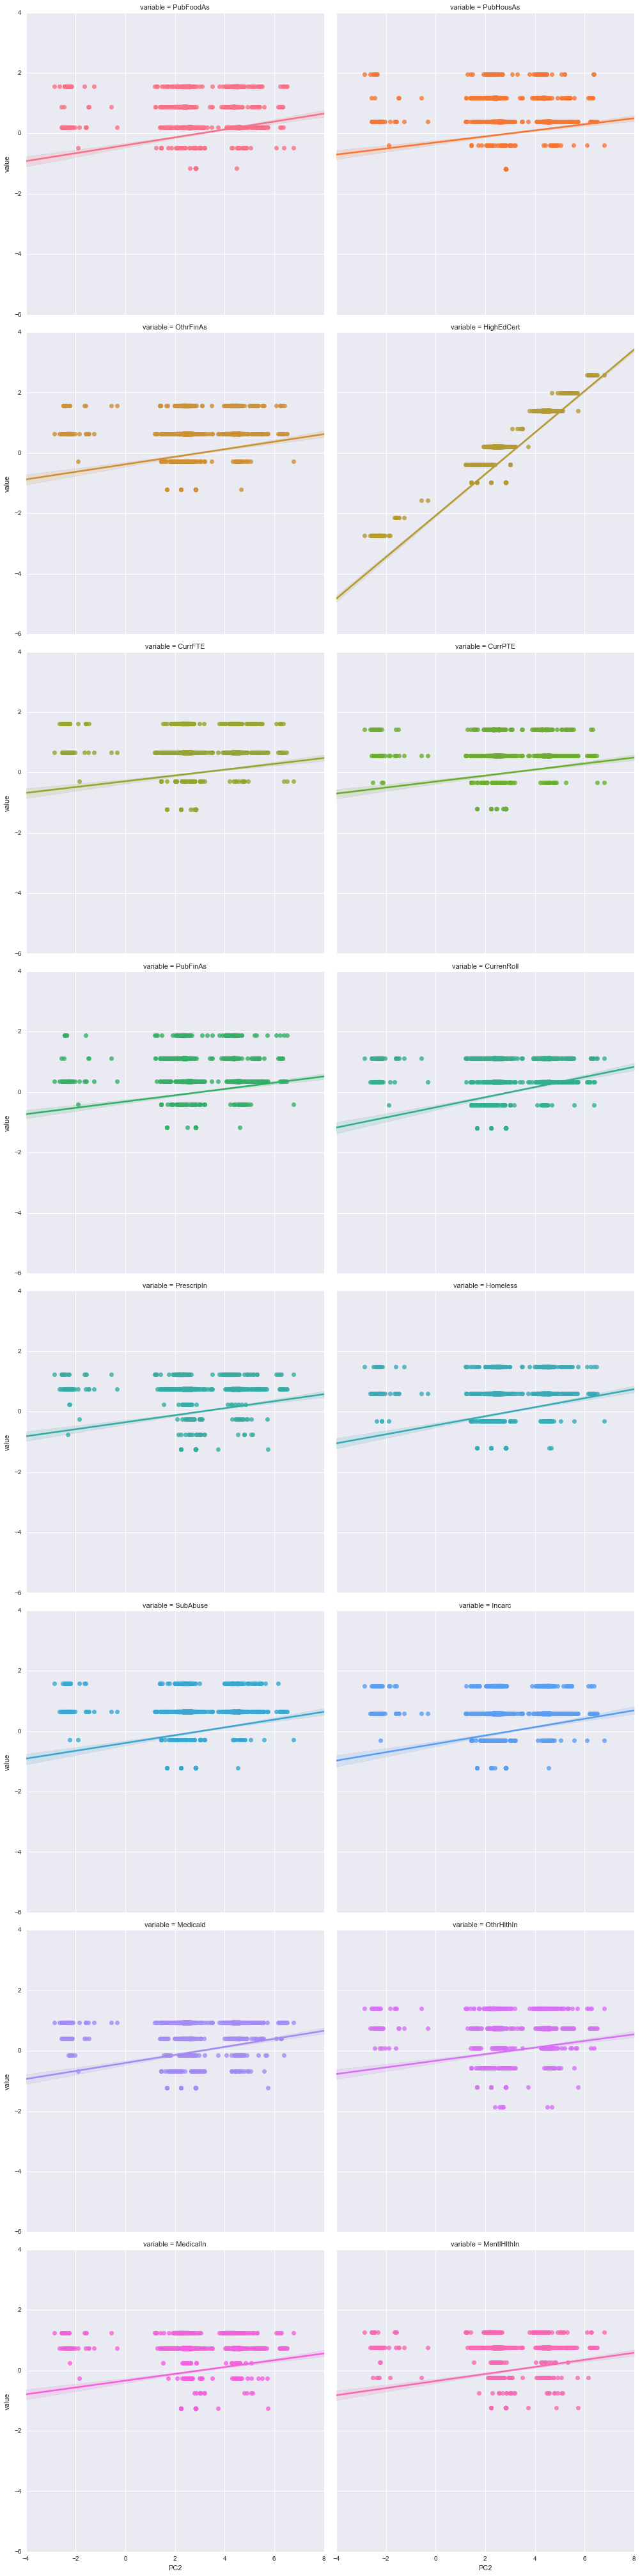

In [176]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=targets_pcs, col_wrap=2, size=7, scatter_kws={'s':50})


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=6)
# pca.fit(features_w2)
# print(pca.explained_variance_)
# print(pca.components_)

In [201]:
x_corr = np.corrcoef(features_w2.values.T)
features_w2.corr()

,St,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv,Num_services
St,1.000000,0.197502,0.193723,0.194269,0.195765,0.193863,0.197298,0.194507,0.194524,0.193627,0.195963,0.195717,0.194651,0.194449,0.193362,0.196864,-0.122563
ILNAsv,0.197502,1.000000,0.998852,0.999198,0.999006,0.999071,0.999044,0.999033,0.999059,0.999034,0.999128,0.999318,0.999379,0.999255,0.999129,0.999204,-0.241584
AcSuppSv,0.193723,0.998852,1.000000,0.999307,0.999233,0.999277,0.999177,0.999200,0.999248,0.999216,0.999249,0.999354,0.999376,0.999287,0.999174,0.999179,-0.234288
PSEdSuppSv,0.194269,0.999198,0.999307,1.000000,0.999427,0.999443,0.999379,0.999404,0.999363,0.999400,0.999426,0.999575,0.999604,0.999583,0.999471,0.999350,-0.237396
CareerSv,0.195765,0.999006,0.999233,0.999427,1.000000,0.999340,0.999379,0.999344,0.999363,0.999321,0.999275,0.999389,0.999420,0.999356,0.999252,0.999172,-0.230502
EmplyTrSv,0.193863,0.999071,0.999277,0.999443,0.999340,1.000000,0.999359,0.999345,0.999333,0.999342,0.999380,0.999498,0.999524,0.999467,0.999360,0.999308,-0.235841
BudgetSv,0.197298,0.999044,0.999177,0.999379,0.999379,0.999359,1.000000,0.999461,0.999428,0.999347,0.999297,0.999412,0.999456,0.999358,0.999238,0.999202,-0.231174
HousEdSv,0.194507,0.999033,0.999200,0.999404,0.999344,0.999345,0.999461,1.000000,0.999409,0.999368,0.999268,0.999438,0.999448,0.999353,0.999271,0.999223,-0.230791
HlthEdSv,0.194524,0.999059,0.999248,0.999363,0.999363,0.999333,0.999428,0.999409,1.000000,0.999421,0.999315,0.999395,0.999444,0.999348,0.999251,0.999222,-0.229853
FamSuppSv,0.193627,0.999034,0.999216,0.999400,0.999321,0.999342,0.999347,0.999368,0.999421,1.000000,0.999370,0.999438,0.999498,0.999403,0.999329,0.999325,-0.232982


In [202]:
eig_valsX, eig_vecsX = np.linalg.eig(x_corr)
print eig_valsX
print eig_vecsX


[  1.50924583e+01   1.02291418e+00   8.76132034e-01   1.17693823e-03
   9.24608675e-04   8.55503332e-04   2.19537406e-04   2.62288796e-04
   7.63623852e-04   3.50846258e-04   6.54456126e-04   4.66122645e-04
   6.24852589e-04   6.02760789e-04   5.59590837e-04   5.09944437e-04
   5.24371418e-04]
[[ -5.39875853e-02  -7.49508440e-01   6.59768439e-01  -2.07848336e-03
    2.99702525e-03   1.40552650e-03   6.50071236e-04   1.20833836e-04
   -5.02299656e-04  -2.55688623e-04  -5.85734557e-04  -2.31478932e-04
    7.03452159e-04  -1.52676532e-03  -2.83886369e-03  -7.55931309e-04
    4.00026041e-04]
 [ -2.57236415e-01   1.73044856e-02   2.03174297e-03   8.60481807e-01
   -1.91703564e-02  -3.55442337e-01  -4.94770825e-02  -8.21918188e-02
    1.01690321e-01   7.12224382e-02  -9.32025789e-03  -1.11467341e-01
    3.24657577e-02   4.89285174e-02  -6.05044683e-02   1.54175660e-02
    1.48036380e-01]
 [ -2.57215386e-01   2.47979348e-02   5.45591271e-03  -4.24674305e-01
    3.38158506e-01  -7.23550760e-01

In [203]:
totX = sum(eig_valsX)
var_expX = [(i / totX)*100 for i in sorted(eig_valsX, reverse=True)]
cum_var_expX = np.cumsum(var_expX)
print cum_var_expX

[  88.77916668   94.79630895   99.95002679   99.95694996   99.96238883
   99.9674212    99.97191311   99.97576285   99.97943846   99.98298411
   99.98627582   99.98936036   99.99236003   99.99510193   99.99716573
   99.9987086   100.        ]


In [204]:
value_vector_pairsX = [[eig_valsX[i], eig_vecsX[:,i]] for i in range(len(eig_valsX))]
value_vector_pairsX.sort(reverse=True)

In [205]:
weight_2d_projectionX = np.hstack((value_vector_pairsX[0][1].reshape(eig_vecsX.shape[1],1),
                                  value_vector_pairsX[1][1].reshape(eig_vecsX.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projectionX

Weight data 2d PCA projection matrix:
[[-0.05398759 -0.74950844]
 [-0.25723641  0.01730449]
 [-0.25721539  0.02479793]
 [-0.25727858  0.02245856]
 [-0.25722578  0.02575801]
 [-0.25725529  0.02373731]
 [-0.25723862  0.02420857]
 [-0.25722745  0.0265006 ]
 [-0.25722399  0.02709168]
 [-0.25723804  0.025743  ]
 [-0.25728006  0.01996722]
 [-0.25734203  0.0152503 ]
 [-0.25733059  0.01851434]
 [-0.25731111  0.01883458]
 [-0.25727985  0.02029967]
 [-0.25730585  0.01413495]
 [ 0.06556594  0.65647981]]


In [206]:
Zx = features_w2.dot(weight_2d_projectionX)


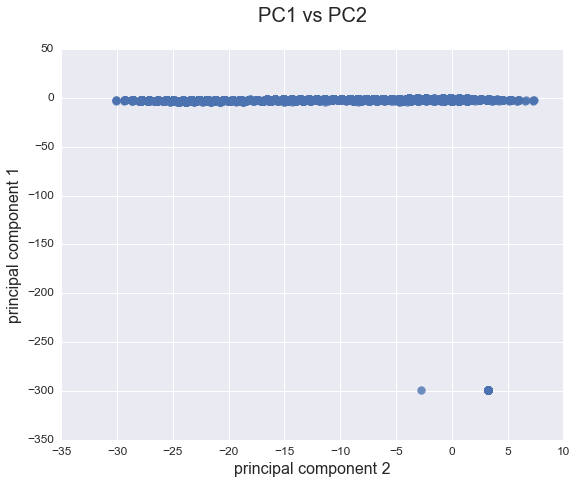

In [223]:
figX = plt.figure(figsize=(9,7))

ax = figX.gca()
ax = sns.regplot(Zx.iloc[:,1], Zx.iloc[:,0],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 2', fontsize=16)
ax.set_ylabel('principal component 1', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

In [226]:
features_2_ = features_w2

features_pcs = features_2_.copy

features_pcs = (features_2_ - features_2_.mean()) / features_2_.std()

features_pcs['PC2'] = Zx.iloc[:,0]
features_pcs['PC1'] = Zx.iloc[:,1]

In [227]:
features_pcs = pd.melt(features_pcs, id_vars=['PC2','PC1'])


In [228]:
features_pcs.head()

,PC2,PC1,variable,value
0,-0.383375,1.359760,St,-1.396589
1,-0.191670,0.673784,St,-1.396589
2,-0.575130,2.025878,St,-1.396589
3,-0.191670,0.673784,St,-1.396589
4,-0.383384,1.350564,St,-1.396589


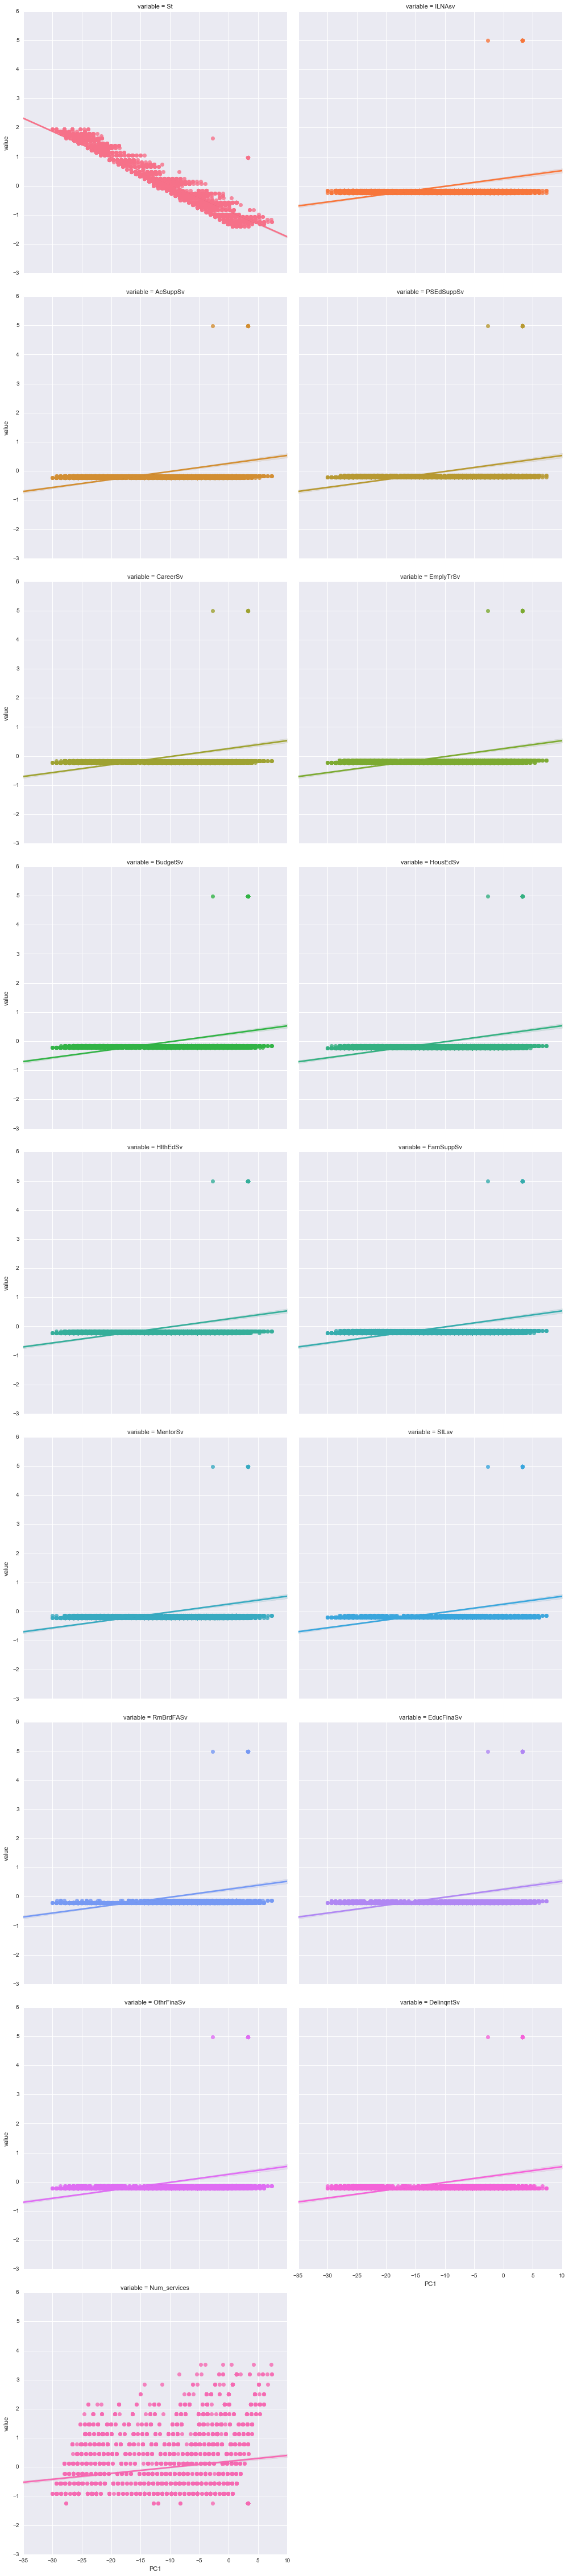

In [229]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=features_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

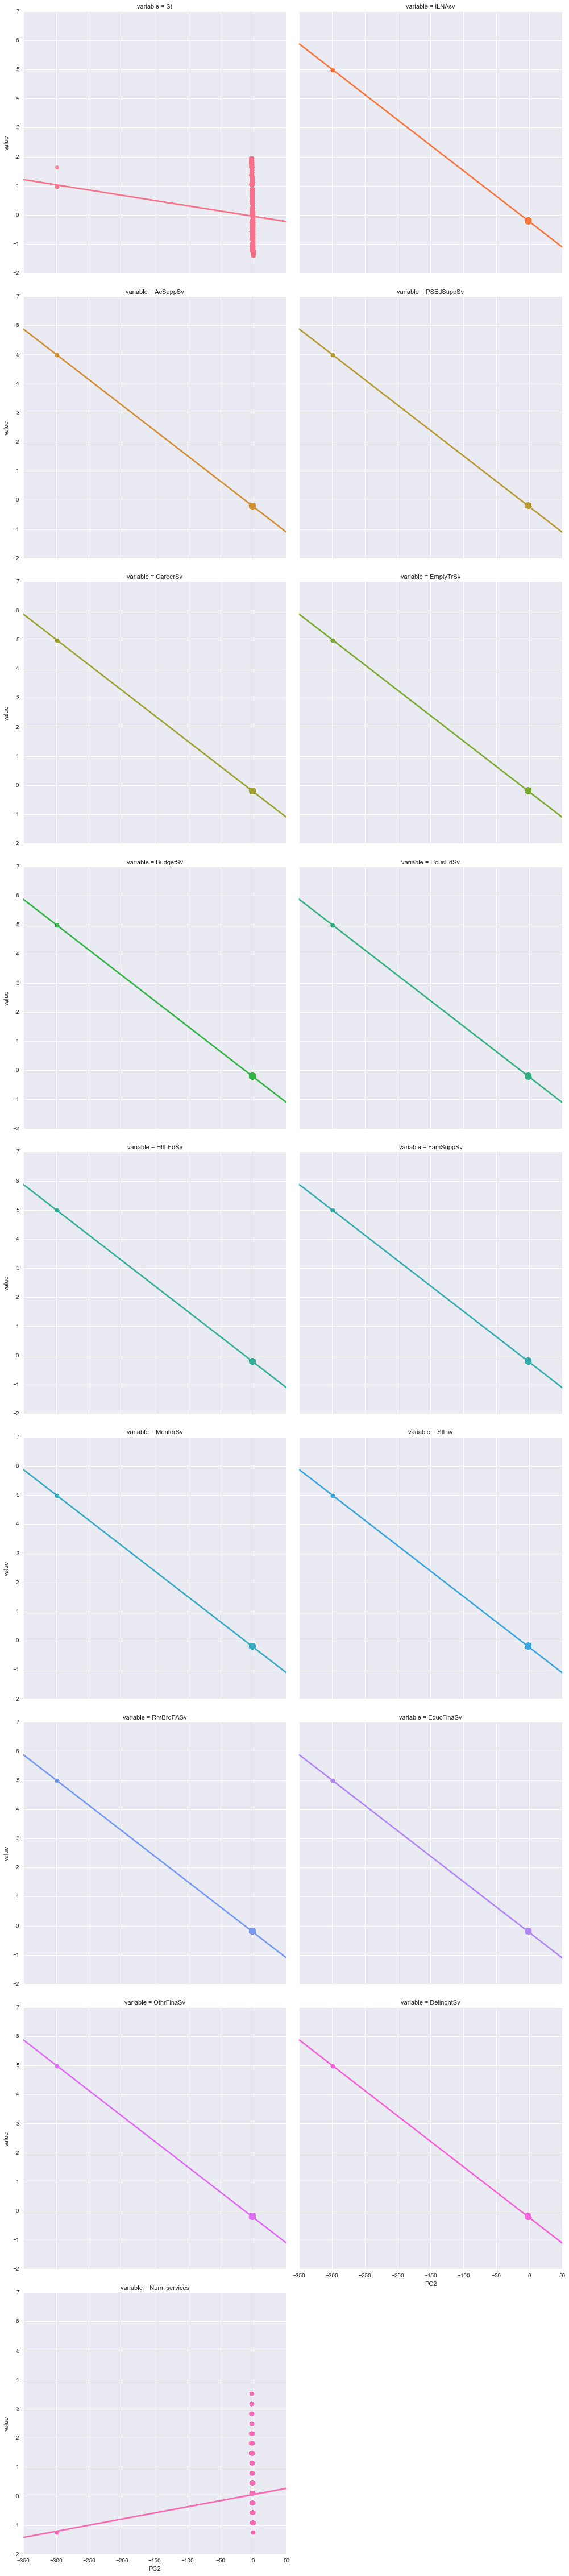

In [230]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=features_pcs, col_wrap=2, size=7, scatter_kws={'s':50})


In [177]:
targets_w2.columns

Index([u'PubFoodAs', u'PubHousAs', u'OthrFinAs', u'HighEdCert', u'CurrFTE',
       u'CurrPTE', u'PubFinAs', u'CurrenRoll', u'PrescripIn', u'Homeless',
       u'SubAbuse', u'Incarc', u'Medicaid', u'OthrHlthIn', u'MedicalIn',
       u'MentlHlthIn'],
      dtype='object')

In [178]:
targets_w2.columns.get_loc("PubFoodAs")


0

In [179]:
targets_w2.columns.get_loc("MentlHlthIn")


15

In [180]:
targets_w2.columns.get_loc("HighEdCert")


3

In [181]:
features_w2.columns.get_loc("ILNAsv")


1

In [182]:
features_w2.columns.get_loc("Num_services")


16

In [183]:
# Establish x and y variables. Average_airport_departure_delay will be target variable for this analysis...
x = features_w2.ix[:,:].values
y = targets_w2.ix[:,:].values

In [184]:
# Standardize data

from sklearn.preprocessing import StandardScaler

xStand = StandardScaler().fit_transform(x)

/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [185]:
# Calculate eigenvectors and eigenvalues from covariance matrix.

covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [186]:
print(eigenValues)
print(eigenVectors)

[  1.50945182e+01   1.02305379e+00   8.76251609e-01   1.17709886e-03
   9.24734867e-04   8.55620092e-04   2.19567369e-04   2.62324593e-04
   7.63728073e-04   3.50894142e-04   6.54545447e-04   4.66186262e-04
   6.24937870e-04   6.02843055e-04   5.59667210e-04   5.10014035e-04
   5.24442985e-04]
[[ -5.39875853e-02  -7.49508440e-01   6.59768439e-01  -2.07848336e-03
    2.99702525e-03   1.40552650e-03   6.50071236e-04  -1.20833836e-04
    5.02299656e-04  -2.55688623e-04  -5.85734557e-04  -2.31478932e-04
    7.03452159e-04  -1.52676532e-03  -2.83886369e-03  -7.55931309e-04
    4.00026041e-04]
 [ -2.57236415e-01   1.73044856e-02   2.03174297e-03   8.60481807e-01
   -1.91703564e-02  -3.55442337e-01  -4.94770825e-02   8.21918188e-02
   -1.01690321e-01   7.12224382e-02  -9.32025788e-03  -1.11467341e-01
    3.24657577e-02   4.89285174e-02  -6.05044683e-02   1.54175659e-02
    1.48036380e-01]
 [ -2.57215386e-01   2.47979348e-02   5.45591271e-03  -4.24674305e-01
    3.38158506e-01  -7.23550760e-01

In [187]:
# Sorting eigenpairs from highest to lowest

eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

15.0945181775
1.02305379378
0.876251609428
0.00117709886486
0.000924734867375
0.000855620092114
0.000763728072964
0.000654545447156
0.000624937870238
0.000602843054545
0.000559667210326
0.000524442985166
0.000510014034543
0.000466186261671
0.000350894141613
0.000262324593381
0.000219567369245


In [188]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [189]:
print(varExpl)


[88.779166682861515, 6.0171422641843337, 5.1537178447540768, 0.0069231660856174148, 0.0054388745611187441, 0.0050323725395918506, 0.0044919050142943669, 0.0038497419176341816, 0.0036756034671486504, 0.0035456516990850367, 0.0032917108030935571, 0.0030845377539120097, 0.0029996731562234287, 0.0027418979091192656, 0.0020638015152204983, 0.001542875269475809, 0.0012913965085251788]


In [190]:
cvarex = np.cumsum(varExpl)


In [191]:
print(cvarex)

[ 88.77916668  94.79630895  99.95002679  99.95694996  99.96238883
  99.9674212   99.97191311  99.97576285  99.97943846  99.98298411
  99.98627582  99.98936036  99.99236003  99.99510193  99.99716573
  99.9987086  100.        ]


In [213]:
from sklearn.decomposition import PCA 


pcask = PCA(n_components=2)
print pcask.fit(xStand).components_ # See the eigenvectors
xPC = pcask.fit_transform(xStand) # Use the eigenvectors to transform xStand onto new axes

[[ 0.05398759  0.25723641  0.25721539  0.25727858  0.25722578  0.25725529
   0.25723862  0.25722745  0.25722399  0.25723804  0.25728006  0.25734203
   0.25733059  0.25731111  0.25727985  0.25730585 -0.06556594]
 [-0.74950844  0.01730449  0.02479793  0.02245856  0.02575801  0.02373731
   0.02420857  0.0265006   0.02709168  0.025743    0.01996722  0.0152503
   0.01851434  0.01883458  0.02029967  0.01413495  0.65647981]]


In [214]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2'])


In [215]:
features_2_ = features_w2


In [216]:
features_pca = features_2_.join(PCdf, on=None, how='left')


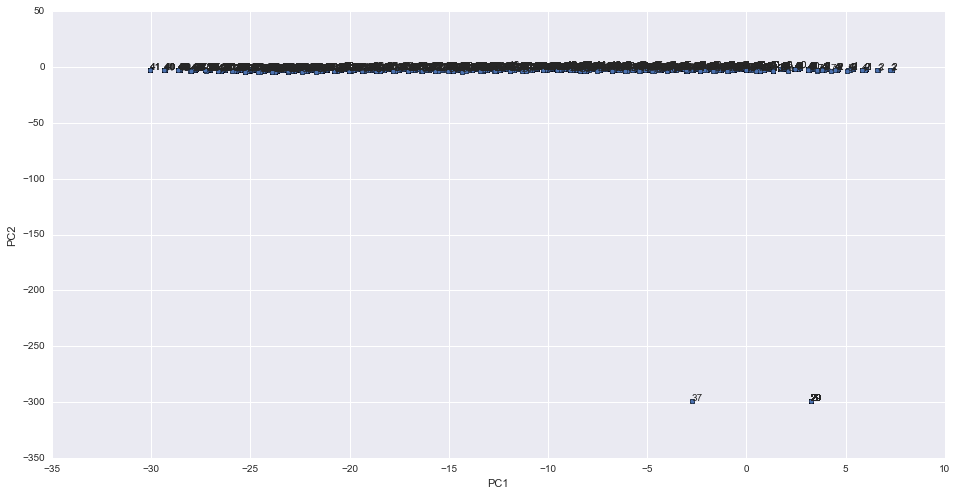

In [233]:
graph = features_pcs.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))

for i, feature in enumerate(features_2_['St']):
    graph.annotate(feature, (features_pcs.iloc[i].PC1, features_pcs.iloc[i].PC2))

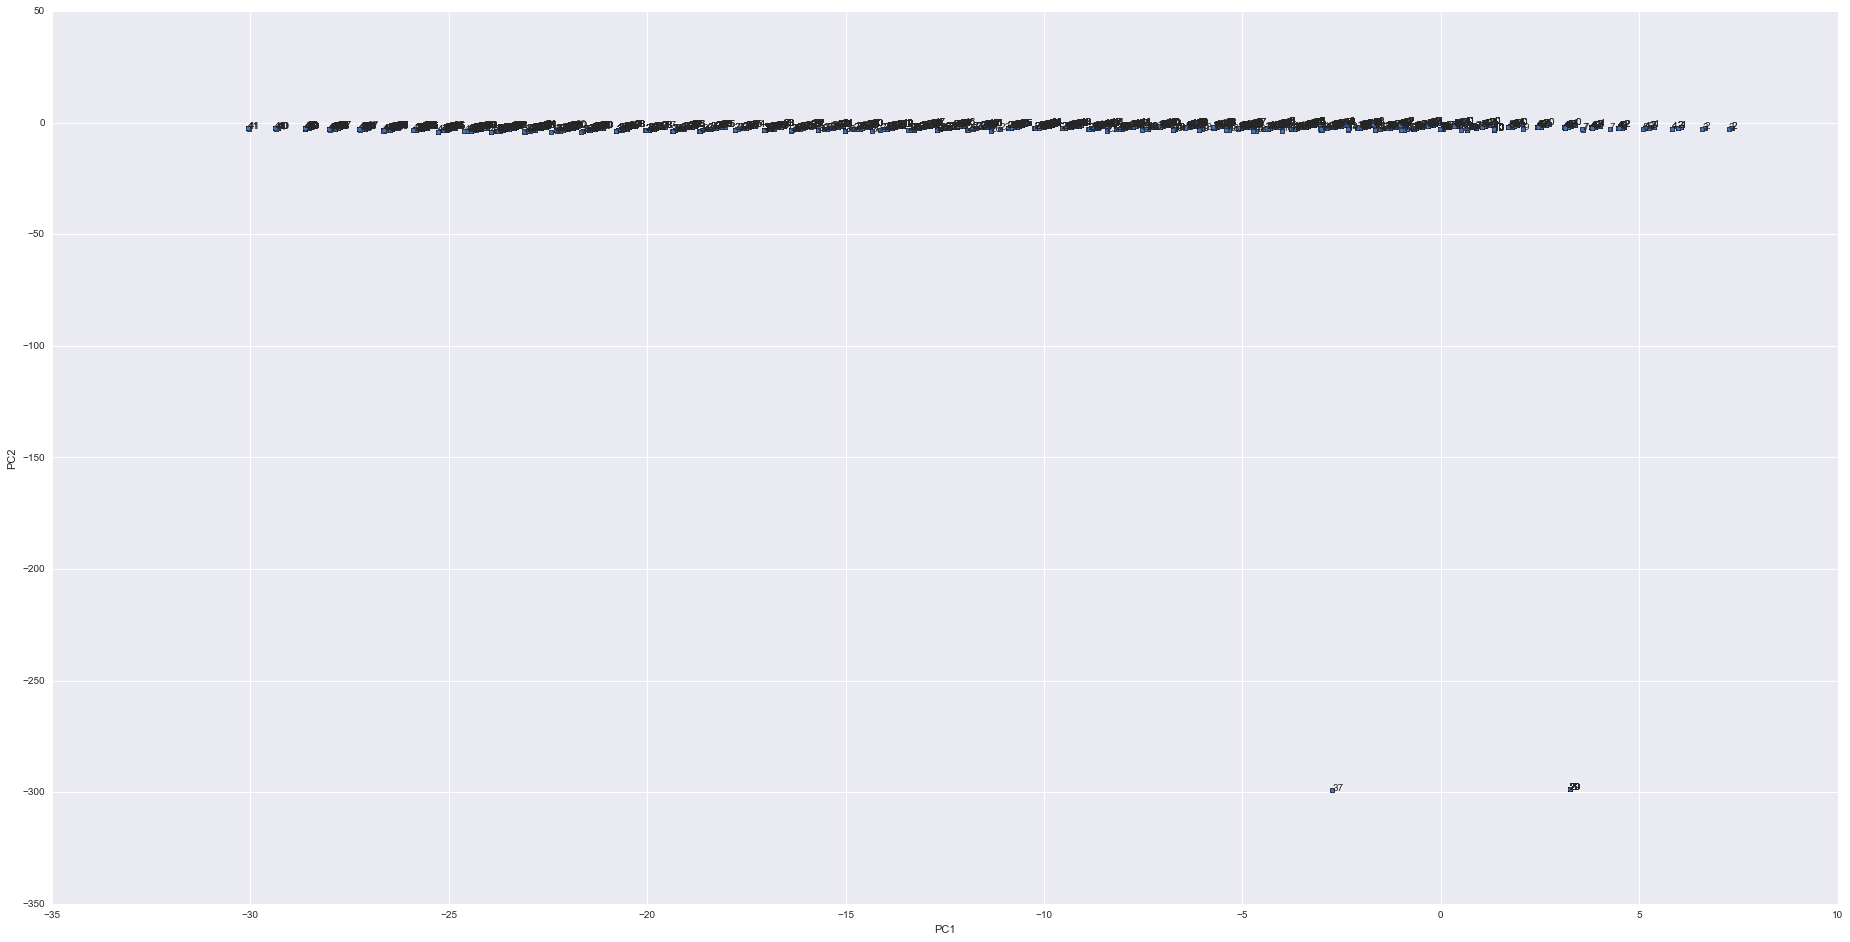

In [234]:
graph = features_pcs.plot(kind='scatter', x='PC1', y='PC2', figsize=(32,16))

features_w2 = features[features.Wave == "Wave 2: Age 19 Followup"]
features_w2 = features_w2.drop('Wave', axis = 1)

for i, feature in enumerate(features_w2['St']):
    graph.annotate(feature, (features_pcs.iloc[i].PC1, features_pcs.iloc[i].PC2))

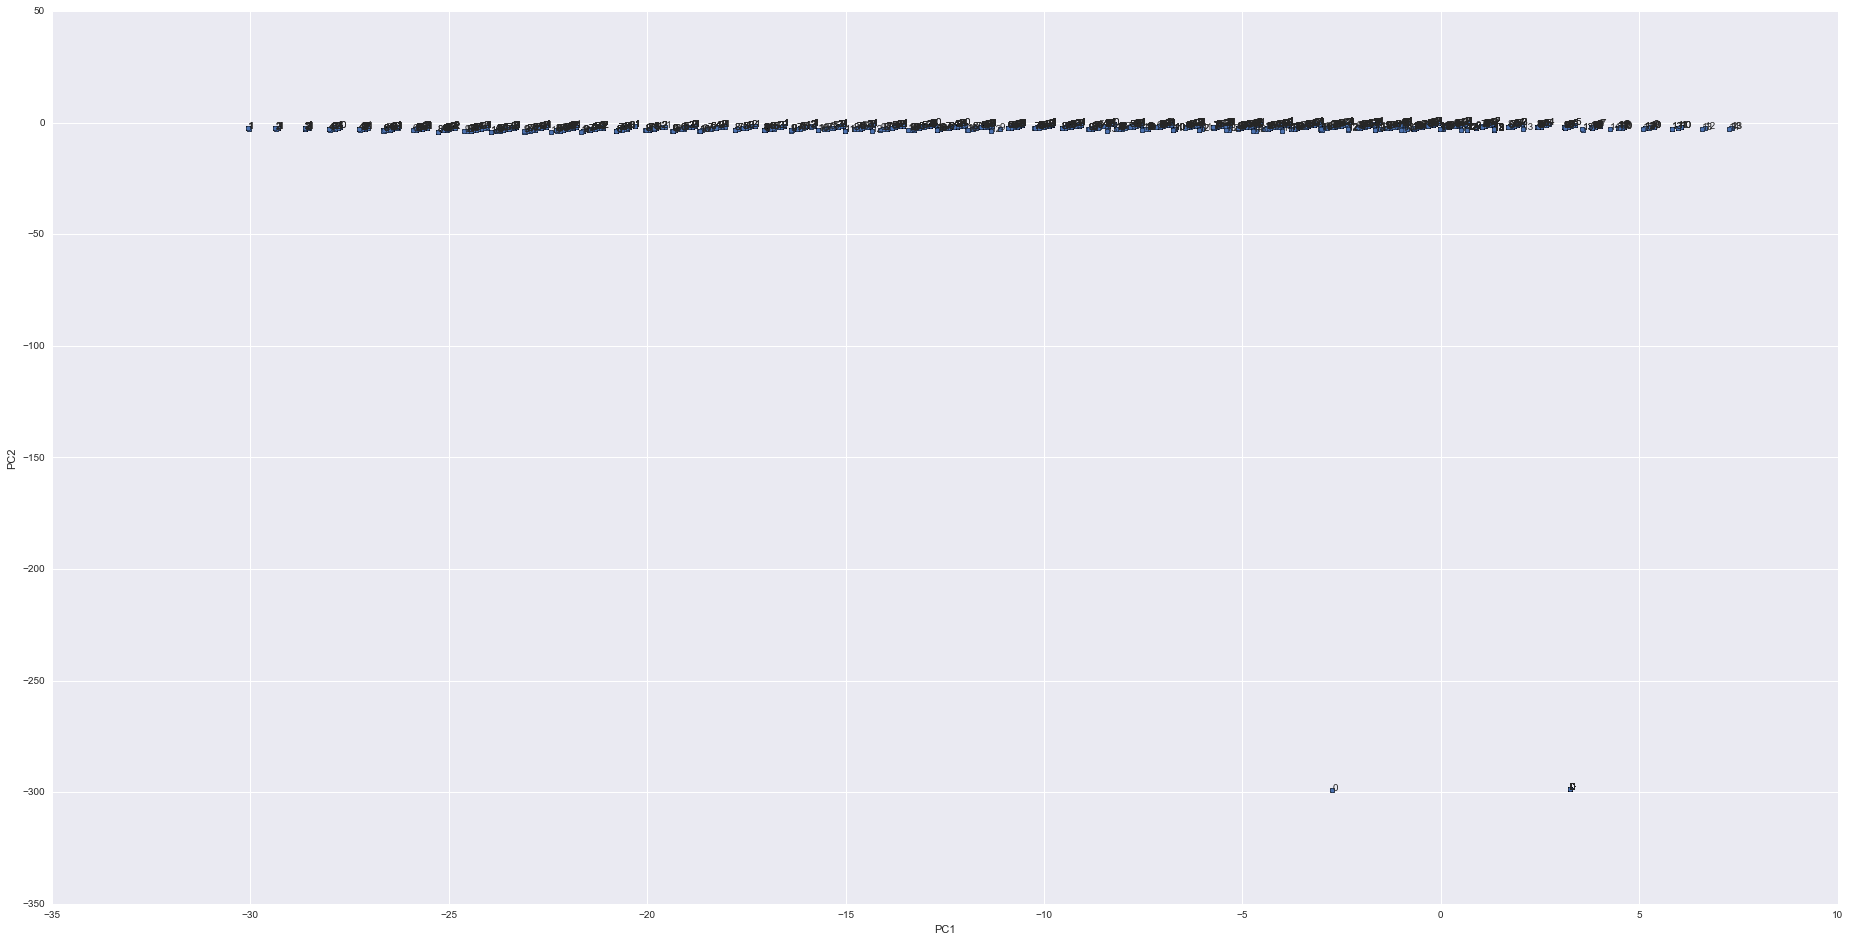

In [237]:
graph = features_pcs.plot(kind='scatter', x='PC1', y='PC2', figsize=(32,16))

for i, feature in enumerate(features_w2['Num_services']):
    graph.annotate(feature, (features_pcs.iloc[i].PC1, features_pcs.iloc[i].PC2))

In [194]:
targets_2 = targets_w2


In [195]:
target_pca = targets_2.join(PCdf, on=None, how='left')


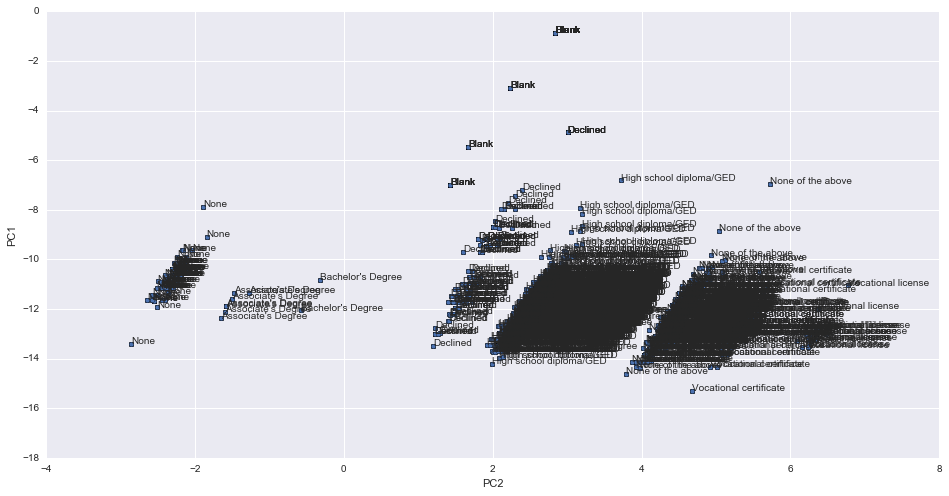

In [196]:
graph = targets_pcs.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, target in enumerate(targets_w2_['HighEdCert']):
    graph.annotate(target, (targets_pcs.iloc[i].PC2, targets_pcs.iloc[i].PC1))

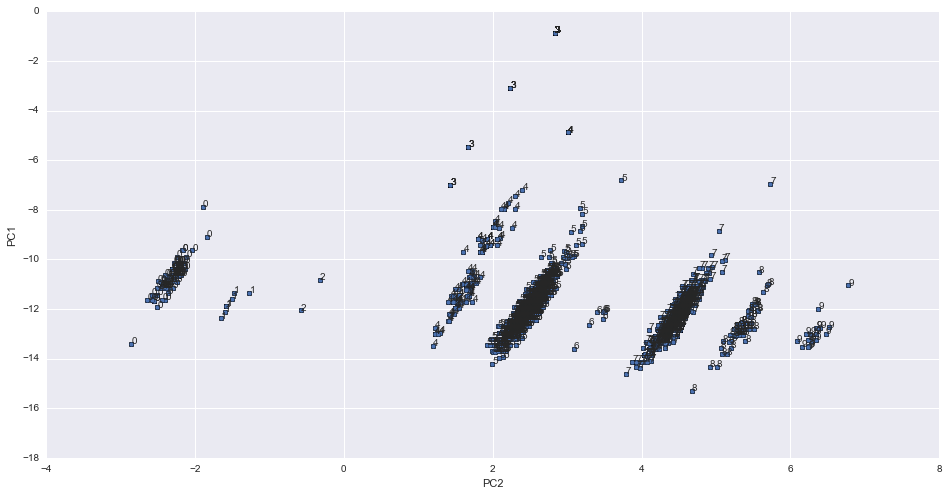

In [197]:
graph = targets_pcs.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, target in enumerate(targets_w2['HighEdCert']):
    graph.annotate(target, (targets_pcs.iloc[i].PC2, targets_pcs.iloc[i].PC1))

# K-Means Cluster Analysis


In [103]:
from sklearn.cluster import KMeans
from sklearn import metrics


kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit(targets_w2)

In [104]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [105]:
print(centroids)

[[  7.46799431e-03   7.46799431e-03   3.20056899e-03   3.00391181e+00
    3.20056899e-03   3.20056899e-03   7.46799431e-03   3.20056899e-03
    1.77809388e-03   3.55618777e-03   3.20056899e-03   3.20056899e-03
    2.48933144e-03   1.00177809e+00   1.77809388e-03   1.77809388e-03]
 [  4.00000000e+00   1.99293286e+00   2.09540636e+00   4.97173145e+00
    2.13074205e+00   2.25088339e+00   1.98939929e+00   2.30035336e+00
    3.98233216e+00   2.27915194e+00   2.13780919e+00   2.21554770e+00
    3.66431095e+00   3.96819788e+00   4.02826855e+00   3.90106007e+00]
 [  1.97304965e+00   1.97872340e+00   2.11631206e+00   7.03829787e+00
    2.07234043e+00   2.16595745e+00   1.98014184e+00   2.57588652e+00
    4.05390071e+00   2.21843972e+00   2.14468085e+00   2.30780142e+00
    3.55744681e+00   4.00851064e+00   4.07801418e+00   4.01276596e+00]
 [  2.48739496e+00   2.18487395e+00   2.12605042e+00   9.24369748e-02
    2.25210084e+00   2.21848739e+00   2.16806723e+00   2.38655462e+00
    4.07563025e+0

In [106]:
metrics.silhouette_score(targets_w2, labels, metric='euclidean')

0.53597774716604096

In [107]:
target_pca['cluster'] = pd.Series(clusters.labels_)


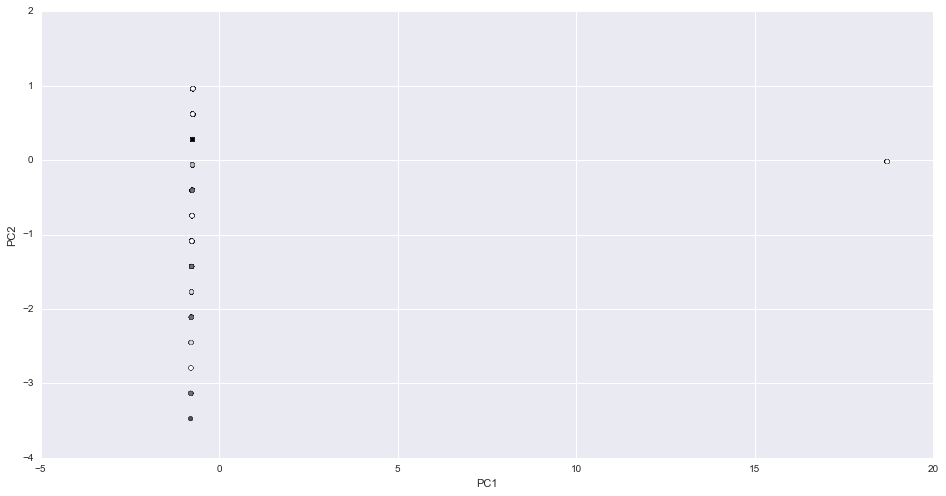

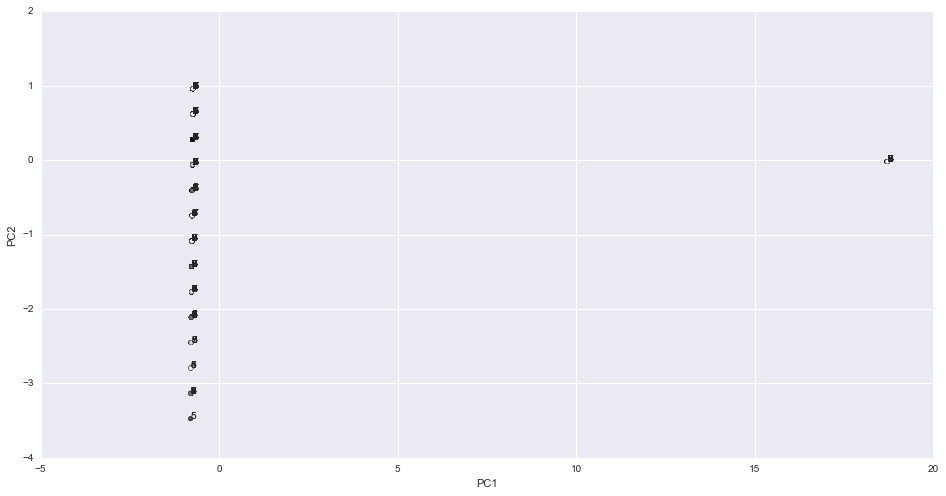

In [108]:

graph = target_pca.plot(
    kind='scatter',
    x='PC1',y='PC2',
    c=target_pca.cluster.astype(np.float), 
    figsize=(16,8))

graph2 = target_pca.plot(
    kind='scatter',
    x='PC1',y='PC2',
    c=target_pca.cluster.astype(np.float), 
    figsize=(16,8))

for i, target in enumerate(targets_w2['HighEdCert']):
    graph2.annotate(target, (target_pca.iloc[i].PC1, target_pca.iloc[i].PC2))

In [ ]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Z = targets_w2.dot(weight_2d_projection)

fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

targets_2 = targets_w2

targets_pcs = targets_2.copy

targets_pcs = (targets_2 - targets_2.mean()) / targets_2.std()

targets_pcs['PC1'] = Z.iloc[:,0]
targets_pcs['PC2'] = Z.iloc[:,1]

targets_pcs = pd.melt(targets_pcs, id_vars=['PC1','PC2'])


In [ ]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_w2, targets_w2, train_size=0.5)

In [ ]:
clf2 = MultiOutputRF().fit(Xtrain, Ytrain)
Ypred = clf2.predict(Xtest)

In [ ]:
accuracy_score(Ytest, Ypred)


In [112]:
import numpy as np
import pandas as pd

from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
X = features_w2

In [114]:
from scipy.spatial import distance as ssd


Z = hierarchy.linkage(ssd.squareform(X), method="complete")


ValueError: The matrix argument must be square.

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z)

In [119]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster

%matplotlib inline

In [115]:
X = features_w2.as_matrix(columns=None)


In [117]:
Z = hierarchy.linkage(X, 'ward')


In [120]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.99863710992254018

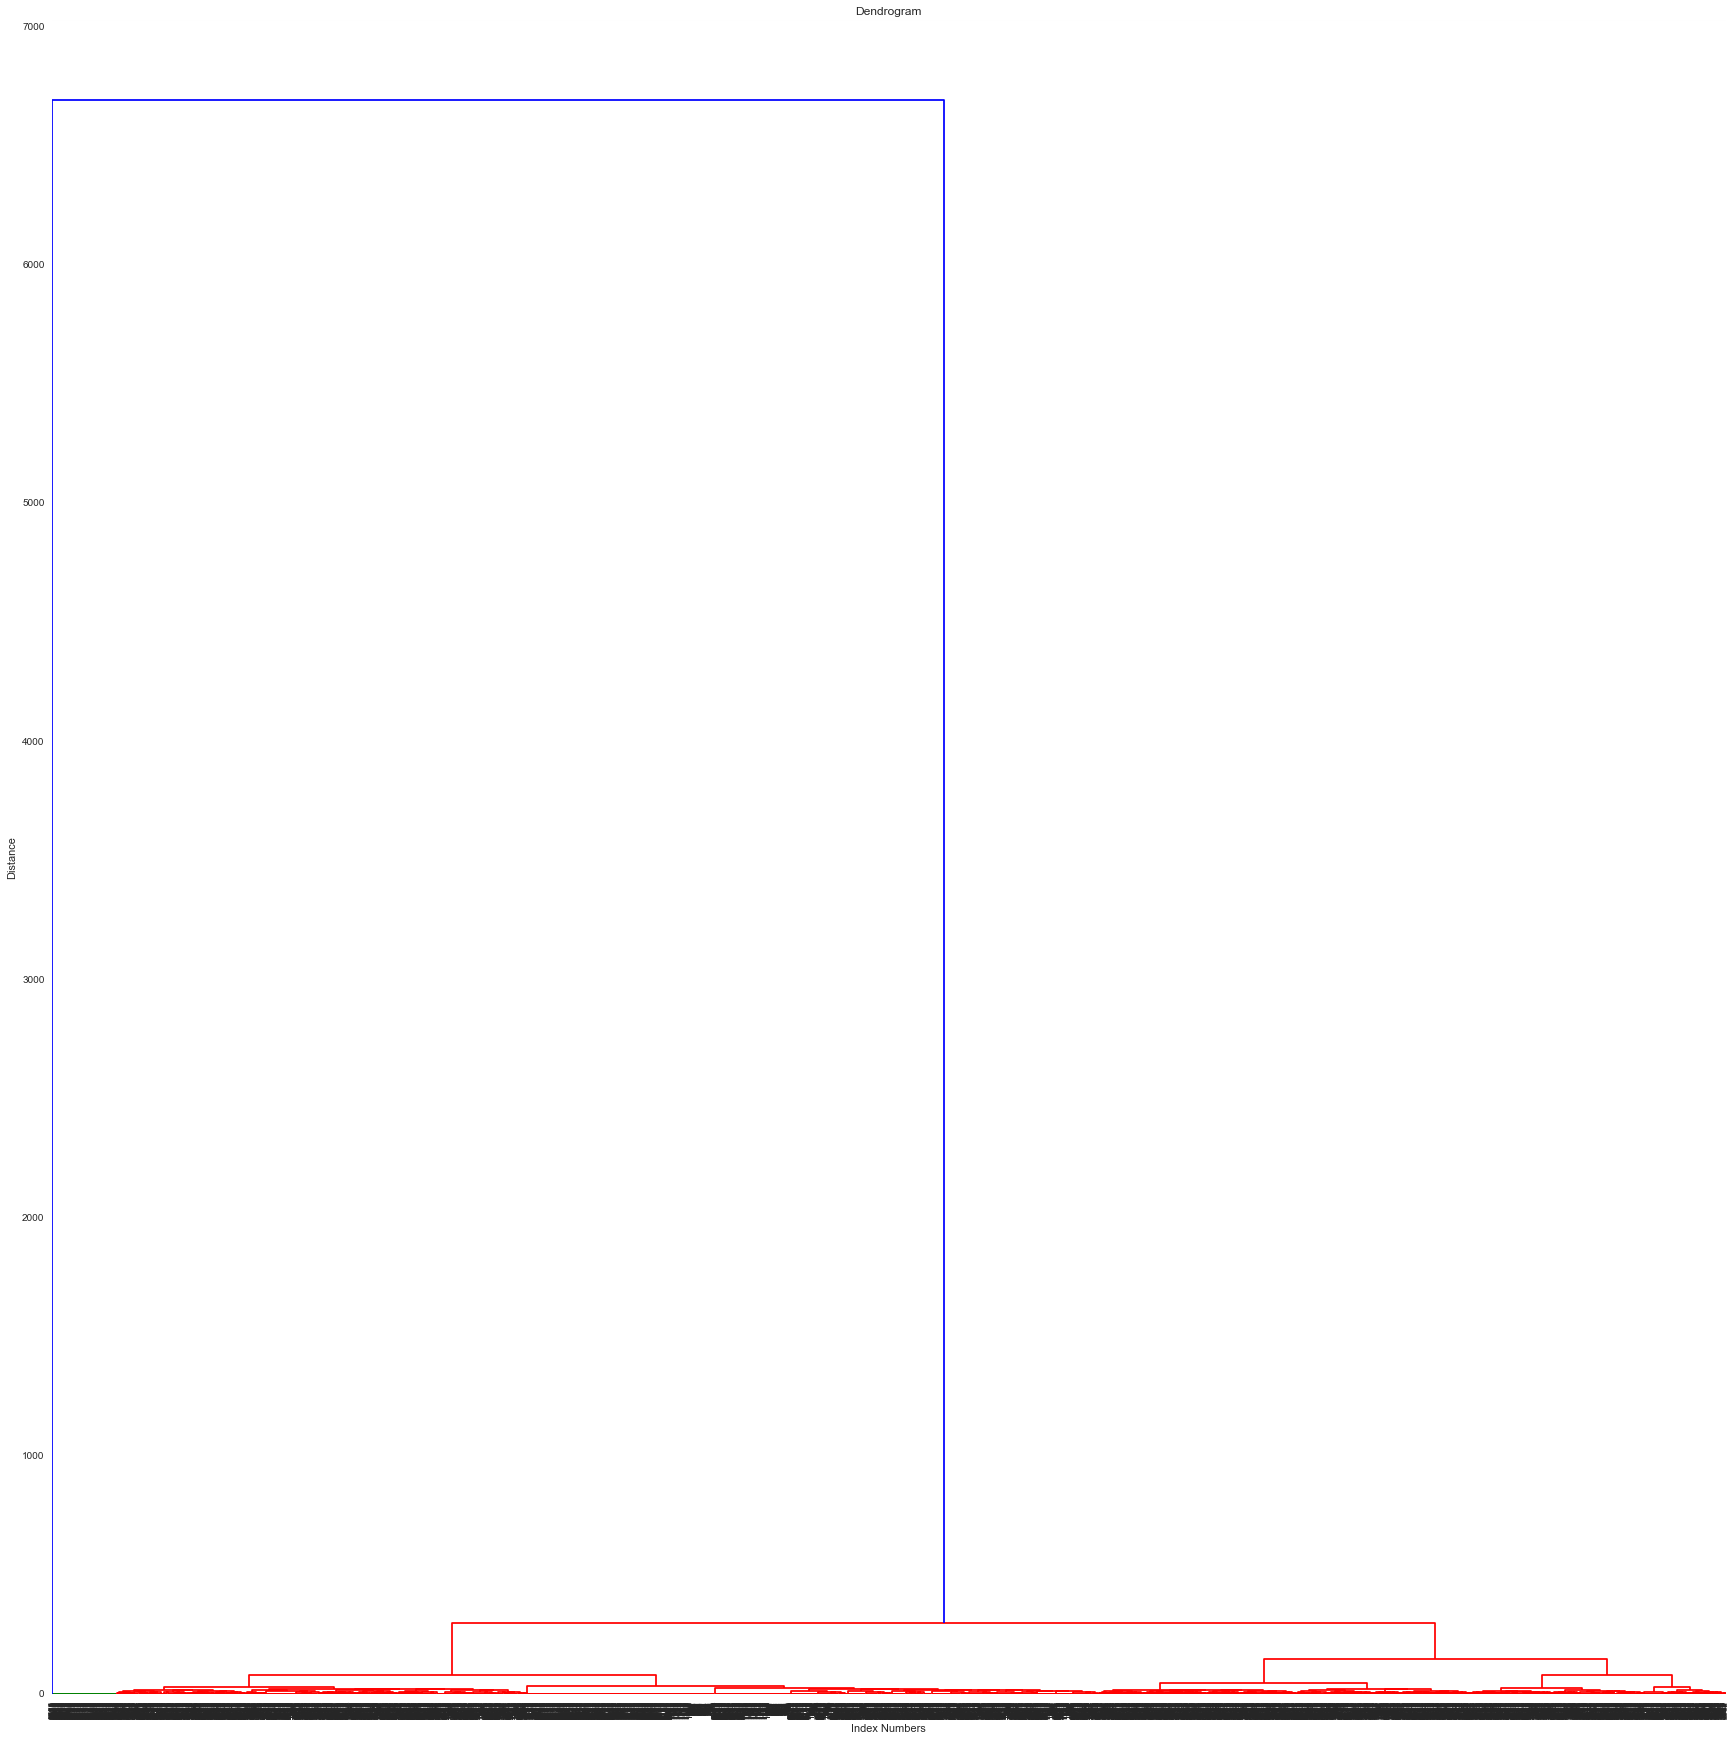

In [122]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

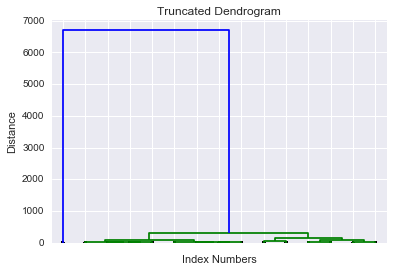

In [123]:
plt.title('Truncated Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=False,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [124]:
max_d = 15
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 6, 10,  6, ..., 15, 24,  7], dtype=int32)

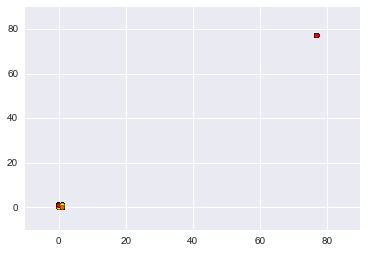

In [125]:
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

# Supervised ML

In [ ]:
# Set up new dataset where only target variable = HighEdCert

